# Data Transformation: Data Creation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import cufflinks as cf

In [2]:
data = pd.read_excel('Data_Train.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# Data Columns
data_columns = data.columns.tolist()
print("Columns: \n")

for column in data_columns:
    print(column)

Columns: 

Airline
Date_of_Journey
Source
Destination
Route
Dep_Time
Arrival_Time
Duration
Total_Stops
Additional_Info
Price


In [5]:
# General Description of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
# Data Description
data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [7]:
# Removing Duplicates
data = data.drop_duplicates()

In [8]:
# Null Values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# Removing Null Values
data = data.drop(data.loc[data['Route'].isnull()].index)

## Airlines

In [10]:
# Plot Function 
def bar_plot(dataframe, column):
    sns.countplot(x = column, data = dataframe)
    plt.xticks(rotation = 90)
    plt.show()

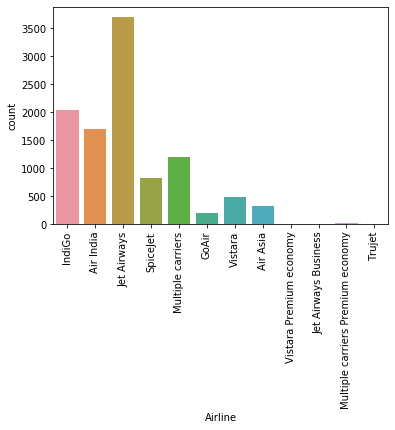

In [11]:
bar_plot(data, 'Airline')

In [12]:
# Merging Categories
data.Airline = np.where(data.Airline == "Vistara Premium economy", "Vistara", data.Airline)
data.Airline = np.where(data.Airline == "Jet Airways Business", "Jet Airways", data.Airline)
data.Airline = np.where(data.Airline == "Multiple carriers Premium economy", "Multiple carriers", data.Airline)

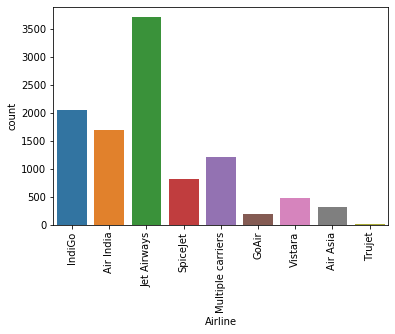

In [13]:
bar_plot(data, 'Airline')

## Flight's Destination

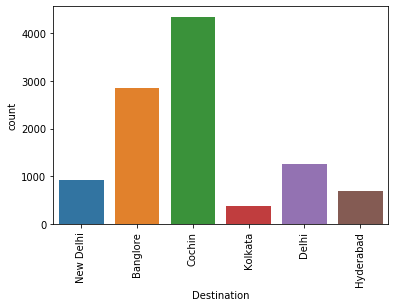

In [14]:
bar_plot(data, 'Destination')

In [15]:
# Merging Destionations
data.Destination = np.where(data.Destination == 'Delhi', 'New Delhi', data.Destination)

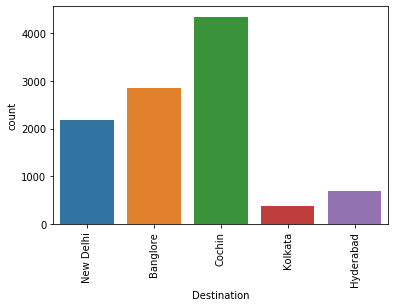

In [16]:
bar_plot(data, 'Destination')

## Date of Journey

In [17]:
# Data Parsing
data.Date_of_Journey = pd.to_datetime(data.Date_of_Journey)

In [18]:
# Extracting "journey_dow" (dow: day of the week)
data['journey_dow'] = data.Date_of_Journey.dt.day_name()

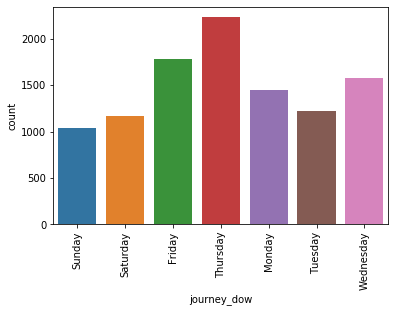

In [19]:
bar_plot(data, 'journey_dow')

In [20]:
# Extracting mont
data['journey_month'] = data.Date_of_Journey.dt.month_name()

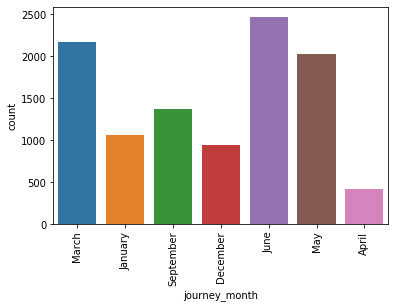

In [21]:
bar_plot(data, 'journey_month')

## Departure Time of Airlines

In [22]:
data['Departure_Time'] = pd.to_datetime(data.Dep_Time, format = '%H:%M')

In [23]:
# Defining Parameters
intervals = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Creating Intervals
data["Departure_Category"] = pd.cut(data.Departure_Time.dt.hour, intervals, labels = labels)
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_dow,journey_month,Departure_Time,Departure_Category
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,March,1900-01-01 22:20:00,Evening
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday,January,1900-01-01 05:50:00,Night
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Friday,September,1900-01-01 09:25:00,Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Thursday,December,1900-01-01 18:05:00,Afternoon
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Thursday,January,1900-01-01 16:50:00,Afternoon


In [24]:
# Null Values at Departure_Category
data.isnull().sum()

Airline                0
Date_of_Journey        0
Source                 0
Destination            0
Route                  0
Dep_Time               0
Arrival_Time           0
Duration               0
Total_Stops            0
Additional_Info        0
Price                  0
journey_dow            0
journey_month          0
Departure_Time         0
Departure_Category    40
dtype: int64

In [25]:
# Check Null Values at Departure_Category
data[data.Departure_Category.isnull()].Departure_Time

161    1900-01-01 00:40:00
210    1900-01-01 00:30:00
855    1900-01-01 00:25:00
860    1900-01-01 00:40:00
980    1900-01-01 00:30:00
1806   1900-01-01 00:20:00
2079   1900-01-01 00:30:00
2275   1900-01-01 00:30:00
2481   1900-01-01 00:30:00
2605   1900-01-01 00:25:00
2669   1900-01-01 00:25:00
3067   1900-01-01 00:30:00
3603   1900-01-01 00:20:00
3694   1900-01-01 00:30:00
4266   1900-01-01 00:30:00
4371   1900-01-01 00:40:00
4842   1900-01-01 00:20:00
5041   1900-01-01 00:25:00
5301   1900-01-01 00:30:00
5312   1900-01-01 00:30:00
5950   1900-01-01 00:40:00
6015   1900-01-01 00:30:00
6424   1900-01-01 00:20:00
6507   1900-01-01 00:30:00
6593   1900-01-01 00:30:00
6654   1900-01-01 00:30:00
6788   1900-01-01 00:25:00
6861   1900-01-01 00:30:00
7356   1900-01-01 00:20:00
7735   1900-01-01 00:30:00
7757   1900-01-01 00:30:00
8020   1900-01-01 00:20:00
8179   1900-01-01 00:25:00
8370   1900-01-01 00:30:00
8401   1900-01-01 00:40:00
8692   1900-01-01 00:30:00
9195   1900-01-01 00:40:00
9

In [26]:
# Fill Null Values with "Night"
data["Departure_Category"].fillna("Night", inplace = True)

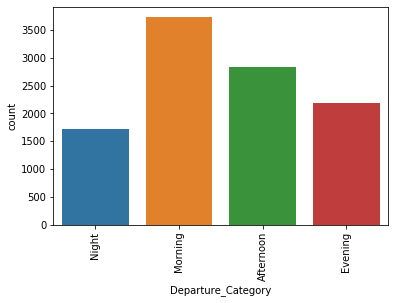

In [27]:
bar_plot(data, 'Departure_Category')

## Duration

** Activity 1 **: Create a column with the total flight duration based on the 'Duration' column.

## Deleting Rows

In [28]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_dow,journey_month,Departure_Time,Departure_Category
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,March,1900-01-01 22:20:00,Evening
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday,January,1900-01-01 05:50:00,Night
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Friday,September,1900-01-01 09:25:00,Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Thursday,December,1900-01-01 18:05:00,Afternoon
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Thursday,January,1900-01-01 16:50:00,Afternoon


In [29]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_dow,journey_month,Departure_Time,Departure_Category
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,March,1900-01-01 22:20:00,Evening
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Saturday,January,1900-01-01 05:50:00,Night
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Friday,September,1900-01-01 09:25:00,Morning
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Thursday,December,1900-01-01 18:05:00,Afternoon
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Thursday,January,1900-01-01 16:50:00,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,Wednesday,September,1900-01-01 19:55:00,Evening
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,Saturday,April,1900-01-01 20:45:00,Evening
10680,Jet Airways,2019-04-27,Banglore,New Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,Saturday,April,1900-01-01 08:20:00,Morning
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,Thursday,January,1900-01-01 11:30:00,Morning


In [30]:
del_rows = ["Arrival_Time", 'Dep_Time', 'Date_of_Journey', 'Departure_Time']
data.drop(labels = del_rows, axis = 1, inplace = True)

## Dummy Variables

In [31]:
# Dummy Variable
departure_category_dummy = pd.get_dummies(data['Departure_Category'])
departure_category_dummy.head()

Departure_Category,Night,Morning,Afternoon,Evening
0,0,0,0,1
1,1,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [32]:
# Concatenating DataFrames
data = pd.concat([data, departure_category_dummy], axis = 1)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_dow,journey_month,Departure_Category,Night,Morning,Afternoon,Evening
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Sunday,March,Evening,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,Saturday,January,Night,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,Friday,September,Morning,0,1,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,Thursday,December,Afternoon,0,0,1,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,Thursday,January,Afternoon,0,0,1,0


** Activity 2 **: Transform all variables into dummy variables as needed.

## References
Based on:
* Feature Engineering in Python ([link](https://towardsdatascience.com/feature-engineering-in-python-part-i-the-most-powerful-way-of-dealing-with-data-8e2447e7c69e))
* Predict The Flight Ticket Price Hackathon ([link](https://www.machinehack.com/course/predict-the-flight-ticket-price-hackathon/))

In [35]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [37]:
# Dummy Variable
total_stops_dummy = pd.get_dummies(data['Total_Stops'])
total_stops_dummy.head()

,1 stop,2 stops,3 stops,4 stops,non-stop
0,0,0,0,0,1
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [38]:
# Concatenating DataFrames
data = pd.concat([data, total_stops_dummy], axis = 1)
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_dow,journey_month,Departure_Category,Night,Morning,Afternoon,Evening,1 stop,2 stops,3 stops,4 stops,non-stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Sunday,March,Evening,0,0,0,1,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,Saturday,January,Night,1,0,0,0,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,Friday,September,Morning,0,1,0,0,0,1,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,Thursday,December,Afternoon,0,0,1,0,1,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,Thursday,January,Afternoon,0,0,1,0,1,0,0,0,0
